# 1. Create a custom gym environment

In [9]:
from gym import Env
from gym.spaces import Discrete, Box
import numpy as np
import random
import math
from enum import Enum
from matplotlib import pyplot as plt
from IPython.display import clear_output

In [2]:
class Action(Enum):
    UP = 0
    DOWN = 1
    LEFT = 2
    RIGHT = 3

In [ ]:
class GameEnv(Env):
    def __init__(self, size = 10, mode='static'):
        self.mode = mode
        self.size = size
        self.GAME_LENGTH = size**2
        self.action_space = Discrete(4)
        self.observation_space = Box(low=0, high=3, shape=(self.size, self.size), dtype=np.int32)
        self.state, self.player, self.goals = self.createBoard()
        self.goals_remaining = len(self.goals)
        #self.visited = np.zeros((self.size,self.size), dtype=np.int32)
        self.time_remaining = self.GAME_LENGTH
        
    def step(self, action):
        self.time_remaining -= 1
        done = False
        
        #evaluate move, save value of the new space before move then update the state
        invalid_move = False
        improved = False
        if Action(action) == Action.UP:
            new_pos = (self.player[0] -1, self.player[1])
            if new_pos[0] >= 0 and self.state[new_pos] != 1:
                improved = self.averageDistanceToGoalImproved(new_pos)
                new_space_val = self.evalMove(new_pos)
            else:
                invalid_move = True
        elif Action(action) == Action.DOWN:
            new_pos = (self.player[0] +1, self.player[1])
            if new_pos[0] < self.size and self.state[new_pos] != 1:
                improved = self.averageDistanceToGoalImproved(new_pos)
                new_space_val = self.evalMove(new_pos)
            else:
                invalid_move = True
        elif Action(action) == Action.LEFT:
            new_pos = (self.player[0], self.player[1] -1)
            if new_pos[1] >= 0 and self.state[new_pos] != 1:
                improved = self.averageDistanceToGoalImproved(new_pos)
                new_space_val= self.evalMove(new_pos)
            else:
                invalid_move = True
        elif Action(action) == Action.RIGHT:
            new_pos = (self.player[0], self.player[1] +1)
            if new_pos[1] < self.size and self.state[new_pos] != 1:
                improved = self.averageDistanceToGoalImproved(new_pos)
                new_space_val = self.evalMove(new_pos)
            else:
                invalid_move = True
        else:
            print("Invalid input to step function")
            
        #evaluate reward 
        reward = 0
        if invalid_move:
            reward = -0.5
            done = False
        else:
            if new_space_val == 0:
                if(improved):
                    reward = 0.04
                else:
                    reward = -0.04
                done = False
            elif new_space_val == 3:
                self.goals_remaining -= 1
                if self.goals == 0:
                    reward = 20
                    done = True
                else:
                    reward = 20
                    done = False
        
        #evaluate if out of time
        if self.time_remaining == 0:
            done = True
            reward = -20
            
        #placeholder for required return value
        info = {}
        
        return self.state, reward, done, info
    
    def distanceToGoalImproved(self, new_pos):
        distances_before = []
        distances_after = []
        for goal in self.goals:
            distances_before.append(math.sqrt((self.player[0] - goal[0])**2 + (self.player[1] - goal[1])**2))
            distances_after.append(math.sqrt((new_pos[0] - goal[0])**2 + (new_pos[1] - goal[1])**2))
        index_of_closest = distances_before.index(min(distances_before))
        distance_before = distances_before[index

In [101]:
class GameEnv(Env):
    def __init__(self, size = 10, mode='static'):
        self.mode = mode
        self.size = size
        self.GAME_LENGTH = 2 * size**2
        self.action_space = Discrete(4)
        self.observation_space = Box(low=0, high=3, shape=(self.size, self.size), dtype=np.int32)
        self.state, self.player, self.goals = self.createBoard()
        self.goals_remaining = len(self.goals)
        #self.visited = np.zeros((self.size,self.size), dtype=np.int32)
        self.time_remaining = self.GAME_LENGTH
        
    def step(self, action):
        self.time_remaining -= 1
        done = False
        
        #evaluate move, save value of the new space before move then update the state
        invalid_move = False
        improved = False
        if Action(action) == Action.UP:
            new_pos = (self.player[0] -1, self.player[1])
            if new_pos[0] >= 0 and self.state[new_pos] != 1:
                #improved = self.distanceToGoalImproved(new_pos)
                new_space_val = self.evalMove(new_pos)
            else:
                invalid_move = True
        elif Action(action) == Action.DOWN:
            new_pos = (self.player[0] +1, self.player[1])
            if new_pos[0] < self.size and self.state[new_pos] != 1:
                #improved = self.distanceToGoalImproved(new_pos)
                new_space_val = self.evalMove(new_pos)
            else:
                invalid_move = True
        elif Action(action) == Action.LEFT:
            new_pos = (self.player[0], self.player[1] -1)
            if new_pos[1] >= 0 and self.state[new_pos] != 1:
                #improved = self.distanceToGoalImproved(new_pos)
                new_space_val= self.evalMove(new_pos)
            else:
                invalid_move = True
        elif Action(action) == Action.RIGHT:
            new_pos = (self.player[0], self.player[1] +1)
            if new_pos[1] < self.size and self.state[new_pos] != 1:
                #improved = self.distanceToGoalImproved(new_pos)
                new_space_val = self.evalMove(new_pos)
            else:
                invalid_move = True
        else:
            print("Invalid input to step function")
            
        #evaluate reward 
        reward = 0
        if invalid_move:
            reward = -0.5
            done = False
        else:
            if new_space_val == 0:
                #if(improved):
                #    reward = 0.04
                #else:
                reward = -0.04
                done = False
            elif new_space_val == 3:
                self.goals_remaining -= 1
                if self.goals_remaining == 0:
                    reward = 20
                    done = True
                else:
                    reward = 20
                    done = False
        
        #evaluate if out of time
        if self.time_remaining == 0:
            done = True
            reward = -20
            
        #placeholder for required return value
        info = {}
        
        return self.state, reward, done, info
    
    def distanceToGoalImproved(self, new_pos):
        distances_before = []
        distances_after = []
        for goal in self.goals:
            distances_before.append(math.sqrt((self.player[0] - goal[0])**2 + (self.player[1] - goal[1])**2))
            distances_after.append(math.sqrt((new_pos[0] - goal[0])**2 + (new_pos[1] - goal[1])**2))
        index_of_closest = distances_before.index(min(distances_before))
        distance_change = distances_after[index_of_closest] - distances_before[index_of_closest]
        if distance_change < 0:
            return True
        return False
    
    def evalMove(self, new_pos):
        # check if we back_tracked
        #if self.visited[new_pos] == -1:
        #    back_track = True
        #else:
        #    back_track = False
        #update the matrix of visited cells
        #self.visited[self.player] = -1
        #process the move
        new_space_val = self.state[new_pos]
        self.state[self.player] = 0
        self.state[new_pos] = 2
        self.player = new_pos
        return new_space_val
        
    def render(self, mode='human'):
        clear_output(wait=True)
        plt.figure(figsize=(5,5))
        plt.title(f'Clock: {self.time_remaining}, Goals: {self.goals_remaining}')
        plt.imshow(self.state)
        plt.show()
    
    def reset(self):
        self.state, self.player, self.goals =  self.createBoard()
        self.goals_remaining = len(self.goals)
        self.time_remaining = self.GAME_LENGTH
        return self.state
    
    def createBoard(self):
        board = np.matrix([[1,1,1,1,1,1,1,1,1,1],
                 [1,0,0,0,0,0,0,0,0,1],
                 [1,1,1,0,1,1,1,0,1,1],
                 [1,0,0,0,0,1,0,0,0,1],
                 [1,0,1,1,1,1,0,1,0,1],
                 [1,0,1,1,0,3,0,1,0,1],
                 [1,0,0,0,0,0,0,1,0,1],
                 [1,1,1,0,1,0,1,1,0,1],
                 [1,3,0,0,1,0,0,0,3,1],
                 [1,1,1,1,1,1,1,1,1,1]])
        if self.mode == 'static':
            player_pos = (1,1) #(np.random.randint(self.size), np.random.randint(self.size))
            goals = [(5,5),(8,1),(8,8)]
        elif self.mode == 'random':
            player_pos = (np.random.randint(self.size), np.random.randint(self.size))
            goal_pos = (np.random.randint(self.size), np.random.randint(self.size))
            player_goal_distance = math.sqrt((player_pos[0] - goal_pos[0])**2 + (player_pos[1] - goal_pos[1])**2)
            while player_goal_distance < self.size/2:
                goal_pos = (np.random.randint(self.size), np.random.randint(self.size))
                player_goal_distance = math.sqrt((player_pos[0] - goal_pos[0])**2 + (player_pos[1] - goal_pos[1])**2)
        
        board[player_pos] = 2
        for coord in goals:
            if board[coord] == 0:
                board[coord] = 3
        return board, player_pos, goals

### Test

In [98]:
env = GameEnv()
episodes = 15
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0
    num_moves = 0
    num_backtrack = 0
    while not done:
        action = env.action_space.sample()
        n_state, reward, done, info = env.step(action)
        #if reward == -0.25:
        #    num_backtrack += 1
        if reward == 20:
            print("found one")
        score += reward
        num_moves += 1
        
    print(f'Episode:{episode} Score:{score} Moves:{num_moves} Backtracks:{num_backtrack}')

found one
Episode:1 Score:-49.77999999999992 Moves:200 Backtracks:0
Episode:2 Score:-73.03999999999992 Moves:200 Backtracks:0
Episode:3 Score:-69.35999999999993 Moves:200 Backtracks:0
Episode:4 Score:-76.71999999999994 Moves:200 Backtracks:0
found one
Episode:5 Score:-49.77999999999991 Moves:200 Backtracks:0
Episode:6 Score:-75.79999999999994 Moves:200 Backtracks:0
Episode:7 Score:-75.33999999999992 Moves:200 Backtracks:0
Episode:8 Score:-67.51999999999992 Moves:200 Backtracks:0
found one
Episode:9 Score:-52.539999999999914 Moves:200 Backtracks:0
found one
Episode:10 Score:-49.77999999999992 Moves:200 Backtracks:0
found one
Episode:11 Score:-53.91999999999993 Moves:200 Backtracks:0
found one
Episode:12 Score:-52.07999999999992 Moves:200 Backtracks:0
Episode:13 Score:-75.79999999999993 Moves:200 Backtracks:0
found one
Episode:14 Score:-54.83999999999992 Moves:200 Backtracks:0
Episode:15 Score:-78.55999999999993 Moves:200 Backtracks:0


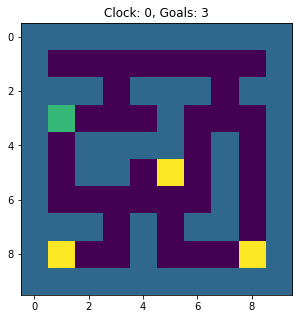

Episode:15 Score:-69.35999999999993


In [99]:
state = env.reset()
done = False
score = 0
while not done:
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    score += reward
    env.render()

print(f'Episode:{episode} Score:{score}')

# 2. Create Deep Learning Model

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [20]:
def build_model(states, actions):
    model = Sequential()
    model.add(Flatten(input_shape=(1,states[0],states[1])))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(actions, activation='linear'))
    return model

In [92]:
del model
del env

In [93]:
env = GameEnv()
states = env.observation_space.shape
actions = env.action_space.n
model = build_model(states,actions)

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               10100     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 404       
Total params: 20,604
Trainable params: 20,604
Non-trainable params: 0
_________________________________________________________________


# 3. Build Agent

In [23]:
from rl.agents.dqn import DQNAgent
from rl.policy import BoltzmannQPolicy, MaxBoltzmannQPolicy, LinearAnnealedPolicy, EpsGreedyQPolicy
from rl.memory import SequentialMemory
#from tf_agents.environments import tf_py_environment

In [24]:
def build_agent(model, actions):
    policy = BoltzmannQPolicy()
    memory = SequentialMemory(limit=100000, window_length=1)
    dqn = DQNAgent(model=model, memory=memory, policy=policy,
                   nb_actions=actions, nb_steps_warmup=100, target_model_update=1 e-2)
    return dqn

In [94]:
#env =  tf_py_environment.TFPyEnvironment(env)

dqn = build_agent(model, actions)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])
dqn.fit(env, nb_steps=100000, visualize=False, verbose=1)

Training for 100000 steps ...
Interval 1 (0 steps performed)
10000/10000 [==============================] - 65s 6ms/step - reward: -0.1380 0s - reward: -
50 episodes - episode_reward: -27.609 [-72.120, -8.320] - loss: 2.452 - mae: 11.406 - mean_q: 15.708

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 56s 6ms/step - reward: -0.1178
50 episodes - episode_reward: -23.550 [-40.580, -10.880] - loss: 1.790 - mae: 12.436 - mean_q: 14.570

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 56s 6ms/step - reward: -0.1141
50 episodes - episode_reward: -22.828 [-51.620, -0.960] - loss: 1.142 - mae: 11.903 - mean_q: 11.455

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 58s 6ms/step - reward: -0.0777
50 episodes - episode_reward: -15.549 [-31.120, 4.100] - loss: 1.177 - mae: 12.785 - mean_q: 11.840

Interval 5 (40000 steps performed)
10000/10000 [==============================] - 62s 6ms/step - re

In [53]:
def dqn_tester(dqn, num_eps, vis = False):
    scores = dqn.test(env, nb_episodes=num_eps, visualize=vis)
    print("Mean Reward: " + str(np.mean(scores.history['episode_reward'])))
    #num_win = 0
    #for steps in scores.history['episode_steps']:
    #    if steps < 100:
    #        num_win += 1
    #print(f'Win Rate: {round(num_win/num_eps, 2) * 100}%')

In [100]:
dqn_tester(dqn, 15)

Testing for 15 episodes ...
Episode 1: reward: 32.160, steps: 200
Episode 2: reward: 32.160, steps: 200
Episode 3: reward: 32.160, steps: 200
Episode 4: reward: 32.160, steps: 200
Episode 5: reward: 32.160, steps: 200
Episode 6: reward: 32.160, steps: 200
Episode 7: reward: 32.160, steps: 200
Episode 8: reward: 32.160, steps: 200
Episode 9: reward: 32.160, steps: 200
Episode 10: reward: 32.160, steps: 200
Episode 11: reward: 32.160, steps: 200
Episode 12: reward: 32.160, steps: 200
Episode 13: reward: 32.160, steps: 200
Episode 14: reward: 32.160, steps: 200
Episode 15: reward: 32.160, steps: 200
Mean Reward: 32.16000000000015


# 4. Saving and Reloading Model

In [102]:
dqn.save_weights('saved_models/10x10_maze_easy.h5f', overwrite=False)

In [103]:
del model
del dqn
del env

In [104]:
env = GameEnv()
actions = env.action_space.n
states = env.observation_space.shape
model = build_model(states, actions)
dqn = build_agent(model, actions)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])

In [105]:
dqn.load_weights('saved_models/10x10_maze_easy.h5f')

In [106]:
dqn_tester(dqn, 15)

Testing for 15 episodes ...
Episode 1: reward: 58.920, steps: 30
Episode 2: reward: 58.920, steps: 30
Episode 3: reward: 58.920, steps: 30
Episode 4: reward: 58.920, steps: 30
Episode 5: reward: 58.920, steps: 30
Episode 6: reward: 58.920, steps: 30
Episode 7: reward: 58.920, steps: 30
Episode 8: reward: 58.920, steps: 30
Episode 9: reward: 58.920, steps: 30
Episode 10: reward: 58.920, steps: 30
Episode 11: reward: 58.920, steps: 30
Episode 12: reward: 58.920, steps: 30
Episode 13: reward: 58.920, steps: 30
Episode 14: reward: 58.920, steps: 30
Episode 15: reward: 58.920, steps: 30
Mean Reward: 58.920000000000044


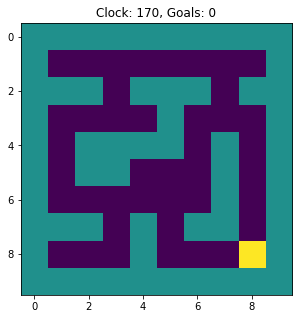

Episode 1: reward: 58.920, steps: 30
Mean Reward: 58.920000000000016


In [109]:
dqn_tester(dqn, 1, True)